<a href="https://colab.research.google.com/github/nedokormysh/GB_fin/blob/main/GB_Final_Berezutskiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

- Визуализируйте распределение количественных переменных
(возраст, уровень холестерина) с помощью box plot и гистограмм.
- Постройте столбчатые диаграммы для анализа распределения
категориальных переменных (пол, тип боли в груди).
Работаем с таблицей
https://drive.google.com/drive/folders/1VixOZfS79REbocxz_adU_7U848zFHdxf
Время выполнения 60 минут.

In [3]:
import pandas as pd
import requests
from io import StringIO

In [4]:
# Получаем содержимое файла по URL с помощью библиотеки requests
url = 'https://raw.githubusercontent.com/nedokormysh/GB_fin/main/Доп.%20материал_Задание_%201_heart.csv'
response = requests.get(url)

# Проверяем, что запрос прошел успешно
if response.status_code == 200:
    # Декодируем полученные данные из байтов в строку с кодировкой 'utf-8'
    csv_content = response.content.decode('utf-8')

    # Создаем StringIO объект из полученной строки
    csv_buffer = StringIO(csv_content)

    # Читаем CSV-файл из StringIO объекта
    df = pd.read_csv(csv_buffer)
else:
    print(f"Ошибка при получении файла по URL: {url}")

## Описание датасета

`age`: Возраст пациента  
`sex`: Пол пациента (0: женщина, 1: мужчина).  
`cp`: Тип боли в груди.   
    *0*: Типичная стенокардия  
    *1*: Атипичная стенокардия  
    *2*: Боль, не связанная со стенокардией  
    *3*: Бессимптомная   
`trestbps`: Артериальное давление в состоянии покоя.   
`slope`: Наклон верхней части первого сегмента упражнения:  
    0: Подъем    
    1: Пологий  
    2: Спуск   
`chol`: холестерин в сыворотке крови.   
`ca` : Количество крупных сосудов (0-4), окрашенных при рентгеноскопии  
`fbs`: Уровень сахара в крови натощак > 120 мг/дл.  
`restecg`: Результаты электрокардиографии в состоянии покоя.  
`thal`: Результат нагрузочного теста на таллий:  
    0: В норме  
    1: Исправленный дефект  
    2: Обратимый дефект  
    3: Не описано    
`thalach`: Достигнута максимальная частота сердечных сокращений.  
`exang`: Стенокардия, вызванная физической нагрузкой.  
    (1 = yes, 0 = no)  
`oldpeak`: снижение уровня ST, вызванное физической нагрузкой по сравнению с отдыхом.  
`target`: Статус сердечно-сосудистых заболеваний (0 = отсутствие заболевания, 1 = наличие заболевания)

## Общая информация о датасете

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


размер датасета

In [6]:
df.shape

(303, 14)

303 строки. 14 столбцов.

Информация о датасете

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().any().any()

False

Пропуски отсутствуют во всех столбцах датасета.

In [9]:
df.duplicated().sum()

1

У нас есть дубли, удалим их из датасета.

In [10]:
df.drop_duplicates(inplace=True)

Все колонки, кроме oldpeak являются типом int. Пропущенных значений нет.

target - целевая переманная

Исходя из описания датаста, часть признаков по сути являются категориальными, а не числовыми

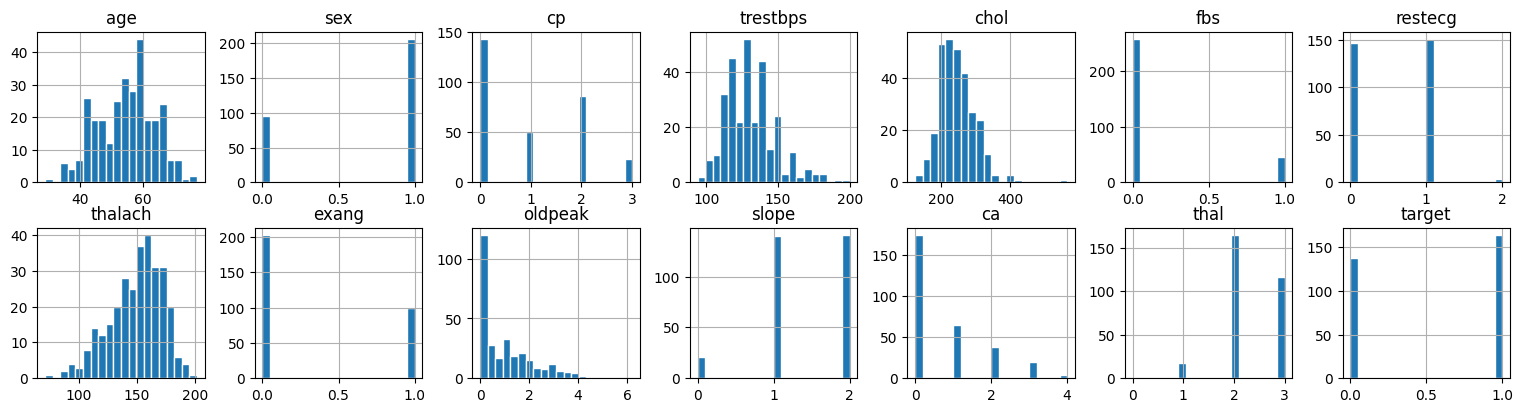

In [11]:
df.hist(figsize=(19,4.5), layout=(-1,7), bins=20, edgecolor='w');

In [12]:
# Определим непрерывные признаки
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Определим признаки, которые будут преобразованы в объектный тип данных
categorical_features = [feature for feature in df.columns if feature not in continuous_features]

In [13]:
# Преобразуем идентифицированные объекты в объектный тип данных
df[categorical_features] = df[categorical_features].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


Если потребуется строить модель, то потребуется нормализация признаков.

Немного необычным является минимум значения oldpeak. В целом выделяющихся значений нет.

## Визуализация распределения количественных переменных

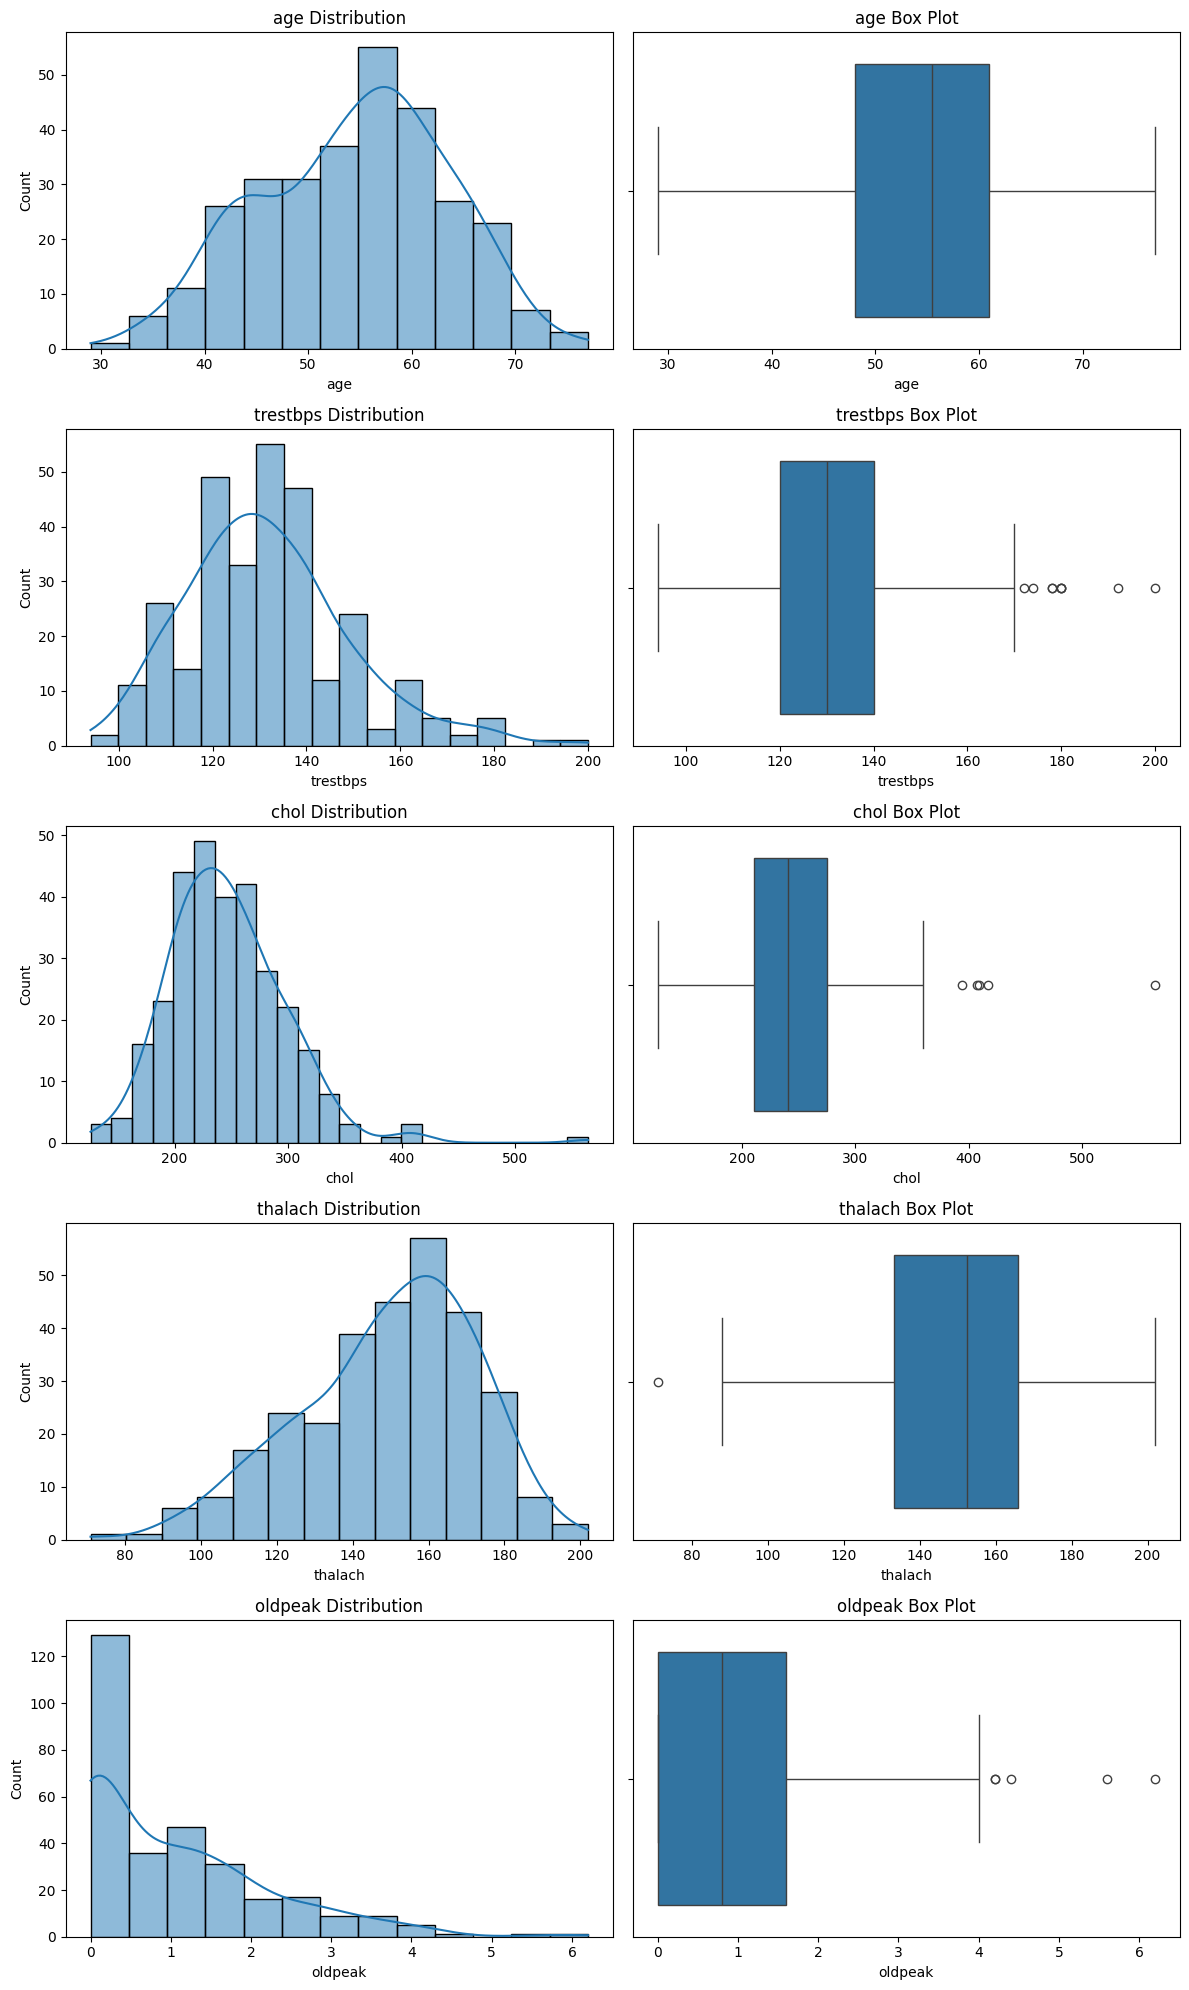

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

n_features = len(continuous_features)
n_rows = n_features
n_cols = 2
# Создание сетки графиков
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

for i, feature in enumerate(continuous_features):
    # Гистограмма
    sns.histplot(data=df, x=feature, ax=axs[i, 0], kde=True)
    axs[i, 0].set_title(f'{feature} Distribution')

    # Box plot
    sns.boxplot(data=df, x=feature, ax=axs[i, 1])
    axs[i, 1].set_title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()

**Выводы:**
- Распределение по возрасту достаточно симметричное
- Распределение trestbps тоже симметричное, есть некоторые выбросы
- Распределение холистерина имеет правостороннюю асимметрию. Есть выбросы, одно значение сильно выделяется
- Распределение thalach скошено влево
- Распределение oldpeak является сильно асимметричным с правым хвостом. Имеются выбросы.

## Столбчатые диаграммы для анализа распределения категориальных переменных

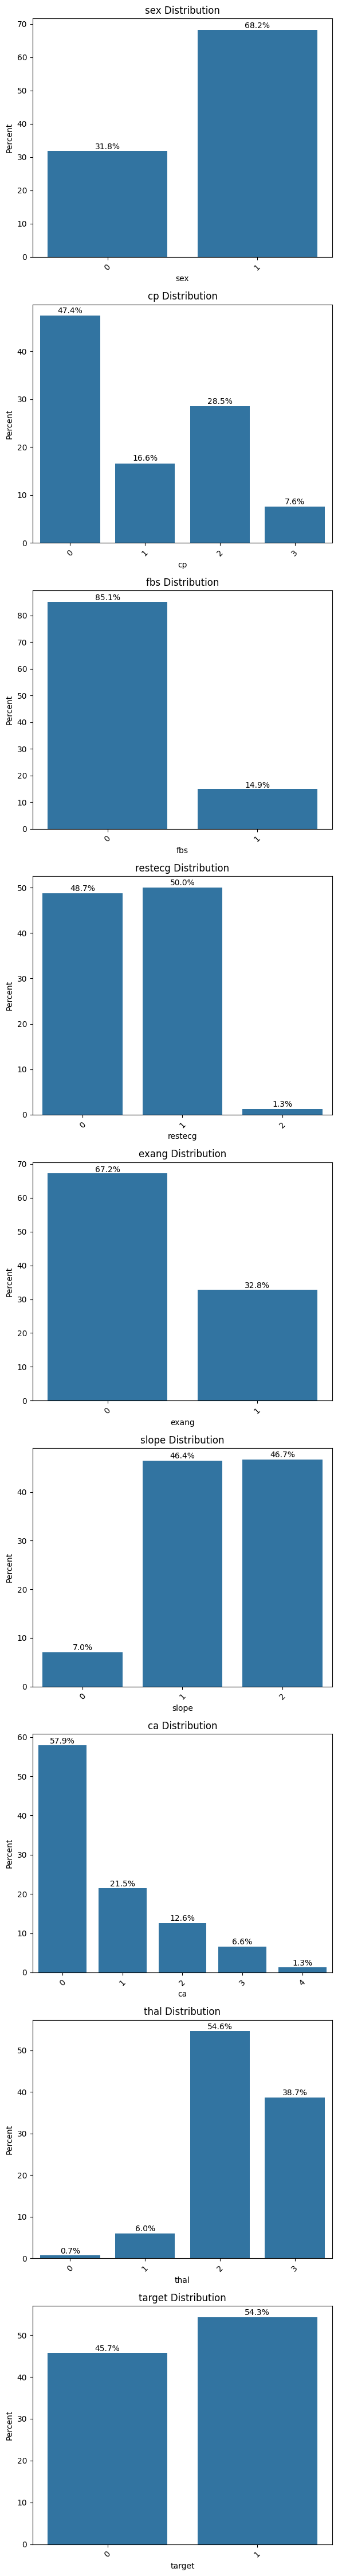

In [16]:
n_features = len(categorical_features)

fig, axs = plt.subplots(n_features, figsize=(6, 5 * n_features))

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts(normalize=True).mul(100).round(1)  # Вычисляем проценты

    # Получаем отсортированные индексы и значения
    sorted_index = value_counts.sort_index().index
    sorted_values = value_counts.sort_index().values

    sns.barplot(x=sorted_index, y=sorted_values, ax=axs[i])  # Сортируем столбцы
    axs[i].set_title(f'{feature} Distribution')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Percent')
    axs[i].tick_params(axis='x', rotation=45)

    # Добавляем проценты над столбцами
    for j, (index, value) in enumerate(value_counts.items()):
        axs[i].text(index, value + 0.5, f'{value}%', ha='center')

plt.tight_layout()
plt.show()

**Выводы:**
- Мужчин в исследовании примерно в два раза больше, чем женщин
- В принципе, по другим категориальным признакам мы также можем видеть большую несбалансированность
- При этом целевая переменная как раз сбалансирована по классам

# Задание 2
Вам предстоит провести эксперименты с моделью машинного обучения и
изучить процесс кросс-валидации и подбора гиперпараметров. Ваша задача
состоит в следующем:
1. Загрузите набор данных, подходящий для задачи классификации или
регрессии. Вы можете использовать любой набор данных,
предоставленный в библиотеке scikit-learn или другом доступном
источнике данных.
2. Разделите данные на обучающую и тестовую выборки с помощью
функции train_test_split из библиотеки scikit-learn.
3. Создайте модель машинного обучения, которую вы хотите использовать
для предсказания на этом наборе данных. Например, можно
использовать модель линейной регрессии или случайный лес для
задачи регрессии, или модель логистической регрессии или случайный
лес для задачи классификации.
4. Используйте метод кросс-валидации, чтобы оценить
производительность модели на обучающей выборке. Например, можно
использовать метод cross_val_score из библиотеки scikit-learn с
использованием метрики оценки, такой как точность (accuracy) или
среднеквадратичная ошибка (mean squared error).
5. Проведите подбор гиперпараметров модели с помощью метода
GridSearchCV из библиотеки scikit-learn. Этот метод позволяет
перебирать различные значения гиперпараметров и выбирать
наилучшие значения на основе кросс-валидации.
6. Обучите модель с использованием оптимальных гиперпараметров на
обучающей выборке и оцени ее производительность на тестовой
выборке.
7. Проведите анализ результатов и сделай выводы о процессе
кросс-валидации и подборе гиперпараметров в задачах машинного
обучения.

## 1. Загрузка данных

Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.

In [17]:
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    precision_score, recall_score, f1_score, roc_auc_score, log_loss, auc,\
    roc_curve, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, \
                       LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, \
StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV

from typing import List,  Optional

In [18]:
!pip install ucimlrepo -q

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [20]:
RND_STATE = 7575

In [21]:
# для отображения лейблов будем производить инвертирование в функции
def plot_confusion_matrix(y_true: np.ndarray,
                          X: pd.DataFrame,

                          ax: Optional[matplotlib.axes.Axes] = None,
                          model#: Optional[Union[sklearn.base.BaseEstimator,
                                                #  sklearn.pipeline.Pipeline]]
                          = None,
                          prediction: Optional[np.ndarray] = None,
                          cmap: str = 'Blues'):
    """Визуализация ConfusionMatrix
    :param y_true: массив с настоящими значениями целевой переменной
    :param X: датафрейм
    :param ax: область рисования на графике
    :param model: экземпляр класса модели
    :param prediction: массив с прогнозируемыми значениями
    :param cmap: строка для выбора цвета отрисовки графика
    """
    if prediction is None:
        prediction = model.predict(X)

    # prediction_inversed = le.inverse_transform(prediction)
    # y_true_inversed = le.inverse_transform(y_true)

    labels = list(set(prediction))

    cm_ovr = confusion_matrix(y_true,
                              prediction,
                              labels=labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ovr,
                                  display_labels=labels)

    if ax:
        disp.plot(ax=ax, cmap=cmap)

In [22]:
def get_metrics_multiclass(y_test_bin: np.array,
                           y_test: np.array,
                           y_pred: np.array,
                           y_prob: np.array,
                           name: str,
                           classes_in_test: List[int],
                           type_multi: str):
    """

    :param y_test_bin: бинаризованные тестовые метки класса
    :param y_test: метки класса без бинаризации
    :param y_prob: предсказанные вероятности классов
    :param name: - название модели/подхода
    :param type_multi: тип многоклассовой классификации для ROC-AUC (ovo/ovr)
    """

    df_metrics = pd.DataFrame()


    df_metrics['model'] = [name]

    # df_metrics['ROC_AUC'] = roc_auc_score(y_test_bin[:, classes_in_test],
    #                                       y_score[:, classes_in_test],
    #                                       multi_class='ovr')


    df_metrics['Precision_micro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='micro')
    df_metrics['Precision_macro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='macro')

    df_metrics['Recall_micro'] = recall_score(y_test, y_pred, average='micro')
    df_metrics['Recall_macro'] = recall_score(y_test, y_pred, average='macro')

    df_metrics['F1_micro'] = f1_score(y_test, y_pred, average='micro')
    df_metrics['F1_macro'] = f1_score(y_test, y_pred, average='macro')
    df_metrics['F1_weighted'] = f1_score(y_test, y_pred, average='weighted')

    return df_metrics

In [23]:
df = pd.concat([X, y], axis=1)
df_original = df.copy()

## Общая информация о датасете

In [24]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.shape

(6497, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [27]:
df.isna().any().any()

False

Нет пропущенных значений.

In [28]:
df.duplicated().sum()

1179

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(5318, 12)

Удалили дубли

### Целевая переменная

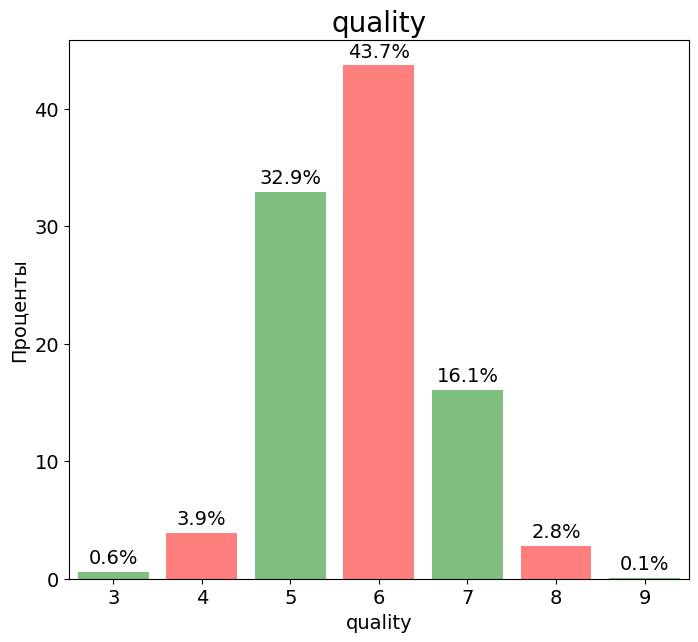

In [31]:
norm_target = df['quality'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
norm_target.columns = ['quality', 'percent']

plt.figure(figsize=(8, 7))
ax = sns.barplot(x='quality', y='percent', data=norm_target, alpha=0.5)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=14)

colors = ['g', 'r']
for i, p in enumerate(ax.patches):
    p.set_facecolor(colors[i % len(colors)])

plt.title('quality', fontsize=20)
plt.xlabel('quality', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

У нас несбалансированный датасет. Мультиклассовая задача.

Для

### Признаки

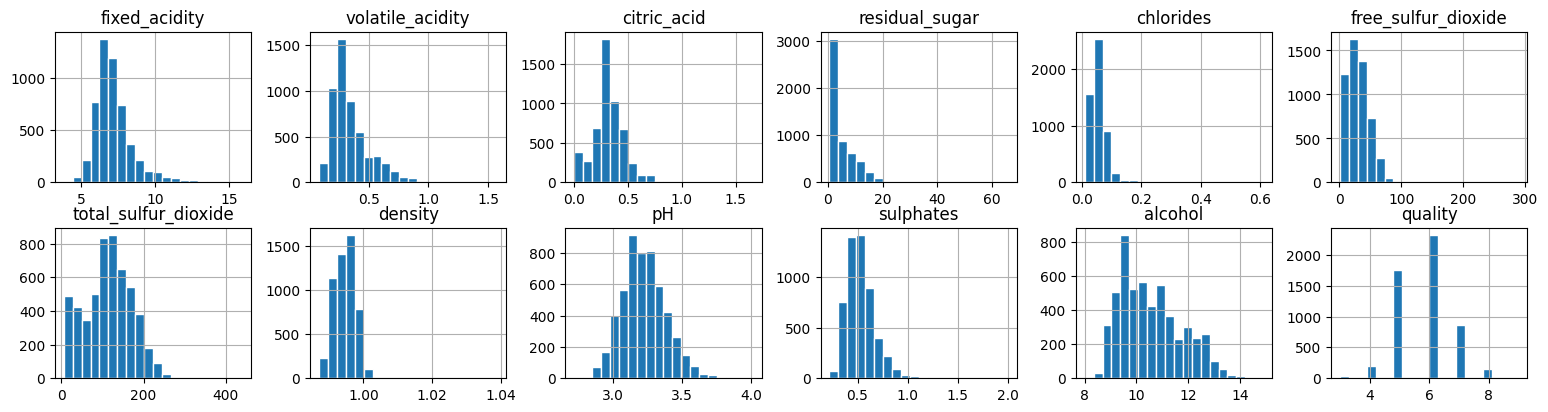

In [32]:
df.hist(figsize=(19,4.5), layout=(-1,6), bins=20, edgecolor='w');

<Axes: >

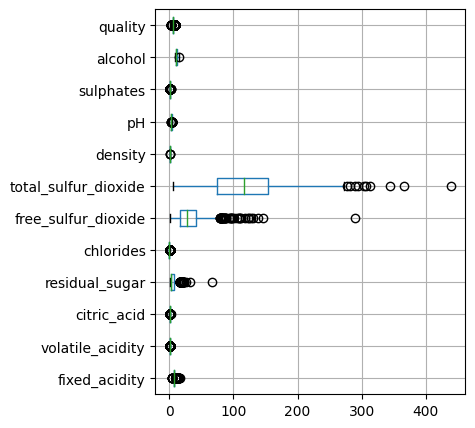

In [33]:
df.boxplot(vert=False, figsize=(4, 5))

Для построения моделей необходимо масштабировать признаки

In [34]:
features = df.drop('quality', axis=1).columns

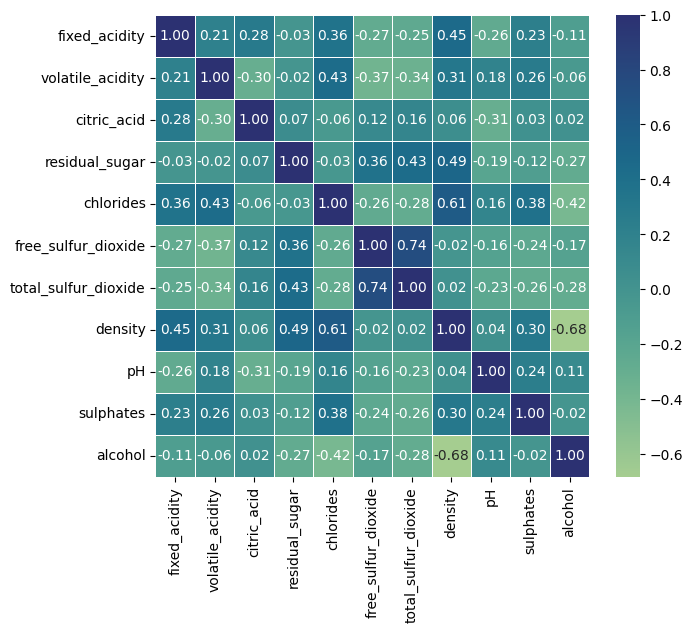

In [35]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[features].corr(method='spearman'),
            annot=True,
            fmt='.2f',
            linewidth=.5,
            cmap="crest");

В принципе, сильно скорелированных признков нет.

## 2. Разделение данных

Разделите данные на обучающую и тестовую выборки с помощью
функции train_test_split из библиотеки scikit-learn.

In [36]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=RND_STATE)

In [45]:
# # для получения ROC AUC требуется бинаризировать
# n_classes = len(set(y['quality']))
classes_in_test = np.unique(y_test)
# y_test_bin = label_binarize(y_test, classes=np.arange(0, 7))
y_test_bin = label_binarize(y_test, classes=np.arange(0, 7))

## 3. Построение модели

Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.

#### Логистическая регрессия

Согласно документации логистическая модель поддерживает мультиклассовую классификацию, при выставлении multinomial (впрочем есть и возможность и выставления ovr).

In [39]:
pipe_lr_base = Pipeline([('scaler', StandardScaler()),
                         ('clf', LogisticRegression(random_state=RND_STATE,
                                            max_iter=10000,
                                            class_weight='balanced',
                                            multi_class='multinomial'))])

In [40]:
pipe_lr_base.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    multi_class='multinomial',
                                    random_state=7575))])

In [41]:
y_pred = pipe_lr_base.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.02      0.33      0.04         6
           4       0.11      0.44      0.17        41
           5       0.56      0.39      0.46       350
           6       0.56      0.24      0.33       465
           7       0.30      0.34      0.32       171
           8       0.12      0.60      0.20        30
           9       0.06      1.00      0.11         1

    accuracy                           0.32      1064
   macro avg       0.25      0.48      0.23      1064
weighted avg       0.49      0.32      0.36      1064



In [46]:
y_score = pipe_lr_base.decision_function(X_test)

metrics = get_metrics_multiclass(y_test_bin=y_test_bin,
                       y_test=y_test,
                       y_pred=y_pred,
                       y_prob=y_score,
                       name='LogisticRegression_Baseline',
                       type_multi='ovr',
                       classes_in_test=classes_in_test
)
metrics

,model,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,F1_weighted
0,LogisticRegression_Baseline,0.324248,0.247517,0.324248,0.477483,0.324248,0.234297,0.361662


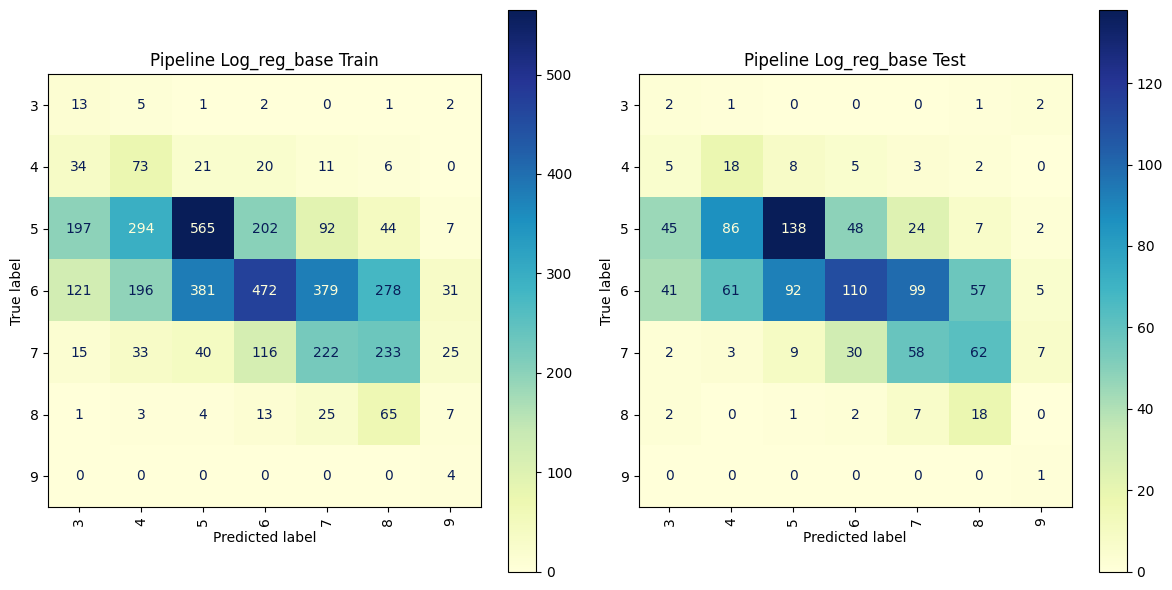

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plot_confusion_matrix(model=pipe_lr_base,
                      y_true=y_train,
                      X=X_train,
                      ax=ax[0],
                      cmap='YlGnBu')
plot_confusion_matrix(model=pipe_lr_base,
                      y_true=y_test,
                      X=X_test,
                      ax=ax[1],
                      cmap='YlGnBu')

ax[0].title.set_text(type(pipe_lr_base).__name__ + ' Log_reg_base' + ' Train')
ax[1].title.set_text(type(pipe_lr_base).__name__ + ' Log_reg_base' + ' Test')

for a in ax:
    plt.sca(a)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Выводы:**
- видно, что модель сильно ошибается практически во всех классах

#### RandomForest

In [51]:
pipe_rf_base = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=RND_STATE, class_weight='balanced'))
])

pipe_rf_base.fit(X_train, y_train)

y_pred = pipe_rf_base.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.38      0.07      0.12        41
           5       0.60      0.62      0.61       350
           6       0.55      0.68      0.61       465
           7       0.55      0.35      0.43       171
           8       0.50      0.03      0.06        30
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1064
   macro avg       0.37      0.25      0.26      1064
weighted avg       0.55      0.56      0.54      1064



In [52]:
y_score = pipe_rf_base.predict_proba(X_test)

metrics = pd.concat([
    metrics,
    get_metrics_multiclass(y_test_bin=y_test_bin,
                       y_test=y_test,
                       y_pred=y_pred,
                       y_prob=y_score,
                       name='RF_Baseline',
                       type_multi='ovr',
                       classes_in_test=classes_in_test)
])

metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,F1_weighted
0,LogisticRegression_Baseline,0.324248,0.247517,0.324248,0.477483,0.324248,0.234297,0.361662
0,RF_Baseline,0.562970,0.367611,0.562970,0.251708,0.562970,0.261714,0.541684


**Выводы:**
- RandomForest показывает значительно лучшие результаты, чем логистическая регресссия. Впрочем, всё равно результаты не впечатляют.

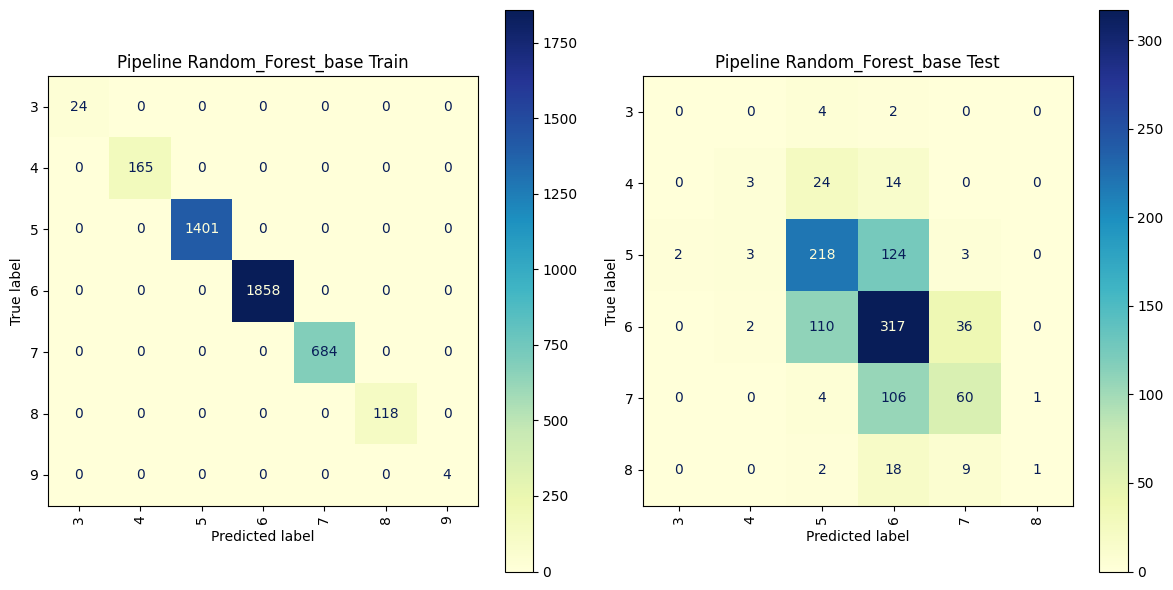

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plot_confusion_matrix(model=pipe_rf_base,
                      y_true=y_train,
                      X=X_train,
                      ax=ax[0],
                      cmap='YlGnBu')
plot_confusion_matrix(model=pipe_rf_base,
                      y_true=y_test,
                      X=X_test,
                      ax=ax[1],
                      cmap='YlGnBu')

ax[0].title.set_text(type(pipe_rf_base).__name__ + ' Random_Forest_base' + ' Train')
ax[1].title.set_text(type(pipe_rf_base).__name__ + ' Random_Forest_base' + ' Test')

for a in ax:
    plt.sca(a)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Выводы:**
- на обучающем датасете модель хорошо предсказывает данные, но на тестовом проявляются ошибки.

## 4. Кросс-валидация

Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).

In [72]:
skf = StratifiedKFold(n_splits=4, random_state=RND_STATE, shuffle=True)
score_oof = []
predicts_test = []

for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # pipe_lr_base = Pipeline([('scaler', StandardScaler()),
    #                      ('clf', LogisticRegression(random_state=RND_STATE,
    #                                         max_iter=10000,
    #                                         class_weight='balanced',
    #                                         multi_class='multinomial'))])

    pipe = Pipeline([('scaler', StandardScaler()),
                             ('clf', RandomForestClassifier(
                                 random_state=RND_STATE,
                                class_weight='balanced'))])

    pipe.fit(X_train_, y_train_)

    y_pred_val = pipe.predict(X_val)
    y_pred_test = pipe.predict(X_test)

    print(y_val.value_counts())
    # print(y_prob_val)
    f1 = f1_score(y_val,
                  y_pred_val,
                  average='weighted')
    print("Fold:", fold + 1, "F1_score  Validation %.3f" % f1)
    print("---")
    # oof list
    score_oof.append(f1)

    # # holdout list
    predicts_test.append(y_pred_test)

quality
6    464
5    351
7    171
4     41
8     30
3      6
9      1
Name: count, dtype: int64
Fold: 1 F1_score  Validation 0.518
---
quality
6    465
5    350
7    171
4     41
8     30
3      6
9      1
Name: count, dtype: int64
Fold: 2 F1_score  Validation 0.521
---
quality
6    465
5    350
7    171
4     41
8     29
3      6
9      1
Name: count, dtype: int64
Fold: 3 F1_score  Validation 0.542
---
quality
6    464
5    350
7    171
4     42
8     29
3      6
9      1
Name: count, dtype: int64
Fold: 4 F1_score  Validation 0.539
---


посчитаем средние значения по фолдам для тестовой выборки

In [73]:
# усредняем предсказания классов по фолдам
test_pred = np.mean(predicts_test, axis=0).astype(int)

In [74]:
# oof - out-of-fold  - предсказания/значение метрики при обучении модели
# в ходе перекрестной проверки на validation data
print('F1 score mean OOF: %.3f, std: %.3f' %
      (np.mean(score_oof), np.std(score_oof)))

# holdout  - предсказания/значение метрики при обучении модели
# после перекрестной проверки на holdout data (в нашем случае для X_test)
print('F1 HOLDOUT: %.3f' %
      f1_score(y_test.values,
               test_pred,
               average='weighted'))

F1 score mean OOF: 0.530, std: 0.011
F1 HOLDOUT: 0.506


Рассмотрим вариант кросс-валидации при помощи sklearn

In [76]:
# Создаем конвейер
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=RND_STATE, class_weight='balanced'))
])
# Обучаем конвейер на обучающей выборке
pipe.fit(X_train, y_train)


# Вычисляем F1-score на обучающей выборке с помощью перекрестной проверки
scores = cross_val_score(pipe, X_train, y_train, cv=4, scoring='f1_weighted')

# Выводим среднее значение F1-score и стандартное отклонение
print('F1 score mean OOF: %.3f, std: %.3f' % (np.mean(scores), np.std(scores)))

# Вычисляем F1-score на тестовой выборке
y_pred = pipe.predict(X_test)
f1_holdout = f1_score(y_test, y_pred, average='weighted')
print('F1 HOLDOUT: %.3f' % f1_holdout)

F1 score mean OOF: 0.537, std: 0.014
F1 HOLDOUT: 0.542


## 5. GridSearch

Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации

In [84]:
parameters_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2'],
    # 'clf__bootstrap': [True, False],
    # 'clf__criterion': ['gini', 'entropy']
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=RND_STATE, class_weight='balanced'))
])
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=RND_STATE)

grid_cv = GridSearchCV(pipe,
                       parameters_grid,
                       scoring='f1_weighted',
                       cv=cv,
                       verbose=1)

Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

In [85]:
%%time
# производим обучение по сетке
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
CPU times: user 18min 53s, sys: 2.93 s, total: 18min 56s
Wall time: 19min 6s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=7575, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=7575))]),
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__min_samples_leaf': [1, 2, 4],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='f1_weighted', verbose=1)

In [86]:
grid_cv.best_params_

{'clf__max_depth': None,
 'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 5,
 'clf__n_estimators': 300}

In [87]:
grid_cv.best_score_

0.5476726746867122

## 6. Обучение модели

Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.

In [89]:
# извлекаем лучшие гиперпараметры из grid_cv
best_params = grid_cv.best_params_

# удаляем префикс 'clf__' из имен гиперпараметров
best_params = {k.replace('clf__', ''): v for k, v in best_params.items()}

# создаем конвейер с лучшими гиперпараметрами
best_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(**best_params, random_state=RND_STATE, class_weight='balanced'))
])

# обучаем модель на обучающей выборке
best_pipe.fit(X_train, y_train)

# делаем предсказания на тестовой выборке
y_pred = best_pipe.predict(X_test)
y_score = best_pipe.predict_proba(X_test)

In [90]:
metrics = pd.concat([
    metrics,
    get_metrics_multiclass(y_test_bin=y_test_bin,
                       y_test=y_test,
                       y_pred=y_pred,
                       y_prob=y_score,
                       name='RF_Gridsearch',
                       type_multi='ovr',
                       classes_in_test=classes_in_test)
])

metrics

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,F1_weighted
0,LogisticRegression_Baseline,0.324248,0.247517,0.324248,0.477483,0.324248,0.234297,0.361662
0,RF_Baseline,0.562970,0.367611,0.562970,0.251708,0.562970,0.261714,0.541684
0,RF_gridsearch,0.580827,0.351626,0.580827,0.285824,0.580827,0.296181,0.568579


## 7. Анализ

Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

**Выбор метрики**
- Несбалансированные данные: В задачах с несбалансированными данными классы имеют различное количество примеров. Метрики, такие как accuracy, могут быть обманчивыми, поскольку модель может достигать высокой точности, просто предсказывая наиболее частый класс. Метрика f1_weighted учитывает дисбаланс классов, взвешивая F1-скоры каждого класса пропорционально их численности в датасете.

- Комбинация precision и recall: F1-скоры сочетают в себе обе метрики: precision (точность) и recall (полнота). Это особенно важно в несбалансированных наборах данных, где нужно учитывать как правильно найденные положительные примеры, так и ложноположительные и ложноотрицательные ошибки. f1_weighted взвешивает вклад каждого класса в общий результат.

- Мультиклассовая классификация: Для мультиклассовых задач F1-скоры могут быть рассчитаны для каждого класса, а затем усреднены. f1_weighted - это взвешенное среднее F1-скоров для каждого класса, что делает его более информативным в контексте мультиклассовой классификации, особенно когда классы имеют разные размеры.

- ROC_AUC не подходит. Не имеет прямого расширения на мультиклассовую классификацию. Не очевидно как выбрать порог для вычисления TPR и FPR.

- Micro-average F1-score: Это среднее значение F1-score, рассчитанное на уровне всех примеров и всех классов. Микро-усреднение учитывает совокупную информацию о классах и эквивалентно вычислению F1-score на объединенном датасете.

- Macro-average F1-score: Это среднее значение F1-score, рассчитанное отдельно для каждого класса и затем усредненное. Макро-усреднение дает равный вес каждому классу, независимо от его размера.

- Weighted-average F1-score: Это взвешенное среднее значение F1-score, учитывающее количество примеров каждого класса. Вес каждого класса определяется его долей в общем числе примеров.

Будем смотреть на метрику F1_weighted. У нас нет предпочтений насчёт точности или полноты классификации статей. Но при этом у нас дисбаланс классов. Хотим учитывать важность класса, в зависимости от количества объектов данного класса.

In [91]:
metrics = metrics.reset_index(drop=True)
metrics = metrics.set_index("model")
metrics = metrics.sort_values("F1_weighted", ascending=False)

def highlight_max(s):
    is_max = s == s.max()
    return ["background-color: yellow" if v else "" for v in is_max]

styled_metrics = metrics.style.apply(highlight_max, subset=["F1_weighted"])

styled_metrics

,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,F1_weighted
model,,,,,,,
RF_gridsearch,0.580827,0.351626,0.580827,0.285824,0.580827,0.296181,0.568579
RF_Baseline,0.562970,0.367611,0.562970,0.251708,0.562970,0.261714,0.541684
LogisticRegression_Baseline,0.324248,0.247517,0.324248,0.477483,0.324248,0.234297,0.361662


**Общие результаты**


- Обучили несколько моделей: бейзлайн логистической регрессии, бейзлайн случайного леса, и модель случайного леса с подбором гиперпараметров
- По выбранной метрике лучше всего себя показал метод RandomForest после подбора гиперпараметров
- Всё равно нельзя сказать, что у нас хорошие результаты. Возможно это объясняется малым количеством объектов в определённых классах.
- Впрочем, если мы всё таки решаем бизнес задачи, то отностиельно безлайна и тем более относительно бейзлайна логистической регрессии, мы видим улучшение результатов.
- Производили кросс-валидацию бейзлайн модели случайного леса. И делали не только кросс-валидацию, но ещё и out of bag валидацию.
- У нас есть разброс как по фолдам (впрочем, std = 0.011), так и oof по качеству модели.

# Задание 3

Задание на ознакомление с датасетом:
Необходимо препроцессировать данные, выбрать только содержательные
колонки; сделать описательную статистику нескольких параметров;
сформулировать гипотезу о взаимосвязи ваших параметров (например,
смертность при раке зависит от пола) и проверить ее с помощью подходящего
метода визуализации.
Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом

In [95]:
import tarfile
from io import BytesIO

In [96]:
# загружаем файл из GitHub
url = 'https://github.com/nedokormysh/GB_fin/raw/main/clinical.project-tcga-dlbc.2023-09-20.tar.gz'
response = requests.get(url)

# разархивируем файл
tar = tarfile.open(fileobj=BytesIO(response.content), mode='r:gz')
tar.extractall()
tar.close()

In [97]:
DATASETS_NAMES = ['clinical.tsv', 'exposure.tsv', 'family_history.tsv', 'follow_up.tsv', 'pathology_detail.tsv']

In [194]:
clinical, exposure, family_history, follow_up, pathology_detail = [pd.read_csv('/content/'+f'{i}', sep='\t') for i in DATASETS_NAMES]
datasets = clinical, exposure, family_history, follow_up, pathology_detail

In [114]:
!pip install phik -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [195]:
import warnings
warnings.filterwarnings("ignore")

## Общий анализ датасетов

Необходимо препроцессировать данные, выбрать только содержательные колонки;

Посмотрим краткую информацию о датасетах.

In [196]:
for i in range(len(datasets)):
    name = DATASETS_NAMES[i].split('.')[0]
    print(f'Датасет: \033[1m{name}\033[0m')
    print(f'Размер датасета: {datasets[i].shape}')
    print('Есть пропуски!\n') if datasets[i].isna().any().any() else print('Пропусков нет\n')
    display(datasets[i].sample(3)) if len(datasets[i]) > 0 else print('В датасете ничего нет')
    print('\n')
    if len(datasets[i]) > 0:
        display(datasets[i].nunique())

    print('-'*300)

Датасет: clinical
Размер датасета: (106, 158)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
71,c85f340e-584b-4f3b-b6a5-540491fc8ad2,TCGA-GS-A9TV,TCGA-DLBC,40,'--,'--,'--,'--,-14838,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Radiation Therapy, NOS"
48,6a21c948-cd85-4150-8c01-83017d7dc1ed,TCGA-G8-6324,TCGA-DLBC,43,'--,'--,'--,'--,-15750,1252,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
22,29e3d122-15a1-4235-a356-b1a9f94ceb39,TCGA-FF-A7CX,TCGA-DLBC,46,'--,'--,'--,'--,-16924,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


case_id                  58
case_submitter_id        58
project_id                1
age_at_index             35
age_is_obfuscated         1
                         ..
treatment_frequency       1
treatment_intent_type     1
treatment_or_therapy      4
treatment_outcome         1
treatment_type            3
Length: 158, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: exposure
Размер датасета: (48, 35)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
34,d7df78b5-24f1-4ff4-bd9b-f0e6bec8289a,TCGA-GR-A4D4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
7,1f971af1-6772-4fe6-8d35-bbe527a037fe,TCGA-FF-8041,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
13,3622cf29-600f-4410-84d4-a9afeb41c475,TCGA-G8-6914,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


case_id                                   48
case_submitter_id                         48
project_id                                 1
age_at_onset                               1
alcohol_days_per_week                      1
alcohol_drinks_per_day                     1
alcohol_history                            1
alcohol_intensity                          1
alcohol_type                               1
asbestos_exposure                          1
bmi                                        1
cigarettes_per_day                         1
coal_dust_exposure                         1
environmental_tobacco_smoke_exposure       1
exposure_duration                          1
exposure_duration_years                    1
exposure_type                              1
height                                     1
marijuana_use_per_week                     1
pack_years_smoked                          1
parent_with_radiation_exposure             1
radon_exposure                             1
respirable

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: family_history
Размер датасета: (0, 9)
Пропусков нет

В датасете ничего нет


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: follow_up
Размер датасета: (0, 112)
Пропусков нет

В датасете ничего нет


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Фактически из 5 предоставленных датасетов информация есть только в двух. И достаточно много колонок с пропущенной информацией или с данными, где у нас во всех строках одна и та же информация. Для возможного построения модели эти данные нам не информативны.

Не будем рассматривать колонки, где количество уникальных значений равно 1.

In [197]:
clinical_info_lst = [i for i in clinical.columns if clinical[i].nunique() != 1]
clinical_info = clinical[clinical_info_lst]

exposure_info_lst = [i for i in exposure.columns if exposure[i].nunique() != 1]
exposure_info = exposure[exposure_info_lst]

In [198]:
# приведём написание данных в разных колонках к одному варианту + заменим пропуски на nan
clinical_info = clinical_info.replace("no", 'No')
clinical_info = clinical_info.replace("yes", 'Yes')
clinical_info = clinical_info.replace("'--", np.nan)
clinical_info.head(2)

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"


In [199]:
exposure_info.head(2)

,case_id,case_submitter_id
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN


Объединять датасеты не имеет смысла, т.к. фактически информация из exposure совпадает с информацией из clinical. Таким образом будем работать с clinical_info.

In [200]:
clinical_info.duplicated().any(), exposure_info.duplicated().any()

(False, False)

Фактически у нас всё таки есть дубли, т.к. для одного и того же case_id у нас 2 записи treatment_type: pharmaceutical и radiation. А также колонка treatment_therapy - в которой указывается проводилось ли лечение.

Добавим пару новых столбцов. Они будут показывать производился ли определённый тип лечения.

In [201]:
clinical_info.treatment_type.unique()

array(['Pharmaceutical Therapy, NOS', 'Radiation Therapy, NOS', nan],
      dtype=object)

In [202]:
clinical_info['treatment_Radiation'] = np.nan
clinical_info['treatment_Pharmaceutical'] = np.nan

In [203]:
def therapy_reaction(row):
    if row['treatment_type'] == 'Pharmaceutical Therapy, NOS':
        row['treatment_Pharmaceutical'] = row['treatment_or_therapy']
    elif row['treatment_type'] == 'Radiation Therapy, NOS':
        row['treatment_Radiation'] = row['treatment_or_therapy']

    return row

clinical_info = clinical_info.apply(therapy_reaction, axis=1)

case_submitter_id - это тоже некоторое id. Не будем его рассматривать. Удалим строки, где информация во всех столбцах отсутствует.

In [204]:
clinical_info = clinical_info.drop(['treatment_or_therapy',	'treatment_type', 'case_submitter_id'], axis=1)

In [205]:
clinical_info.shape

(106, 31)

In [206]:
clinical_info.set_index('case_id', inplace=True)
clinical_info.dropna(axis=0, how='all', inplace=True)
clinical_info.reset_index(drop=False, inplace=True )
clinical_info.shape

(96, 31)

10 строк оказались полностью пустыми и неинформативными.

In [207]:
# запишем информацию о проводившихся типах лечения в одну из дублирующих строк
for i in range(0, len(clinical_info)):
    if i % 2 == 0:
        clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']] =\
        clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']].fillna(clinical_info.loc[i+1][['treatment_Radiation', 'treatment_Pharmaceutical']])

In [208]:
clinical_info_thinned = clinical_info.iloc[::2]
clinical_info_thinned.head(3)

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,NaN,Yes
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,NaN
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,NaN,Yes


Получили прореженный датасет, без дублирующих строк.

Отфильтруем колонки с единственным значением после всех преобразований.

In [209]:
clinical_info_thinned_lst = [i for i in clinical_info_thinned.columns if clinical_info_thinned[i].nunique() != 1]
clinical_info_thinned = clinical_info_thinned[clinical_info_thinned_lst]

In [210]:
clinical_info_thinned.shape

(48, 22)

Осталось малое количество записей.

In [211]:
clinical_info_thinned.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'days_to_last_follow_up', 'icd_10_code', 'prior_treatment',
       'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_Radiation', 'treatment_Pharmaceutical'],
      dtype='object')

In [212]:
continuous_features = ['age_at_index', 'days_to_birth', 'days_to_death',
                       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
                       'days_to_last_follow_up', 'year_of_diagnosis']

categorical_features = [i for i in clinical_info_thinned.columns if i not in continuous_features]

In [213]:
# числовые признаки приведём к типу float, категориальные - к category
for el in continuous_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('float')

for el in categorical_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('category')

## EDA

### Числовые признаки.
Краткое описание числовых характеристик

In [214]:
clinical_info_thinned[continuous_features].describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,48.000000,48.000000,9.000000,48.000000,5.000000,48.000000,43.000000,48.000000
mean,56.270833,-20731.354167,1504.777778,1952.875000,2007.600000,20731.354167,1274.372093,2009.145833
std,13.947835,5107.471500,2129.076665,15.172238,4.929503,5107.471500,1315.464195,5.031770
min,23.000000,-30256.000000,58.000000,1923.000000,2001.000000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,313.000000,1941.000000,2004.000000,16998.250000,441.500000,2009.000000
50%,57.500000,-21146.500000,595.000000,1951.500000,2009.000000,21146.500000,832.000000,2011.000000
75%,67.000000,-16998.250000,1252.000000,1963.250000,2012.000000,24607.750000,1581.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,2012.000000,30256.000000,5980.000000,2013.000000


Каких-то явных выпадающих значений не наблюдаем.

<Axes: >

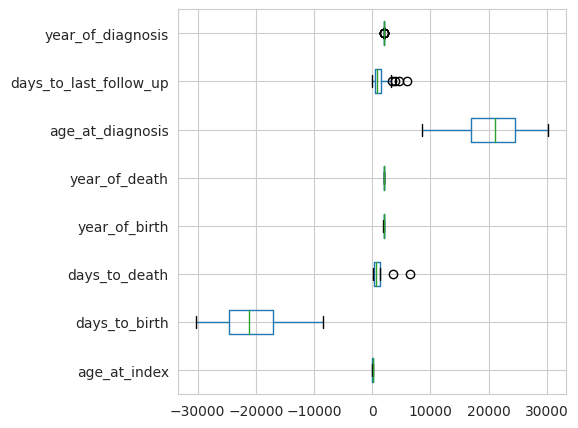

In [215]:
clinical_info_thinned[continuous_features].boxplot(vert=False, figsize=(5, 5))

days_to_birth отсчитываются в отрицательных значениях

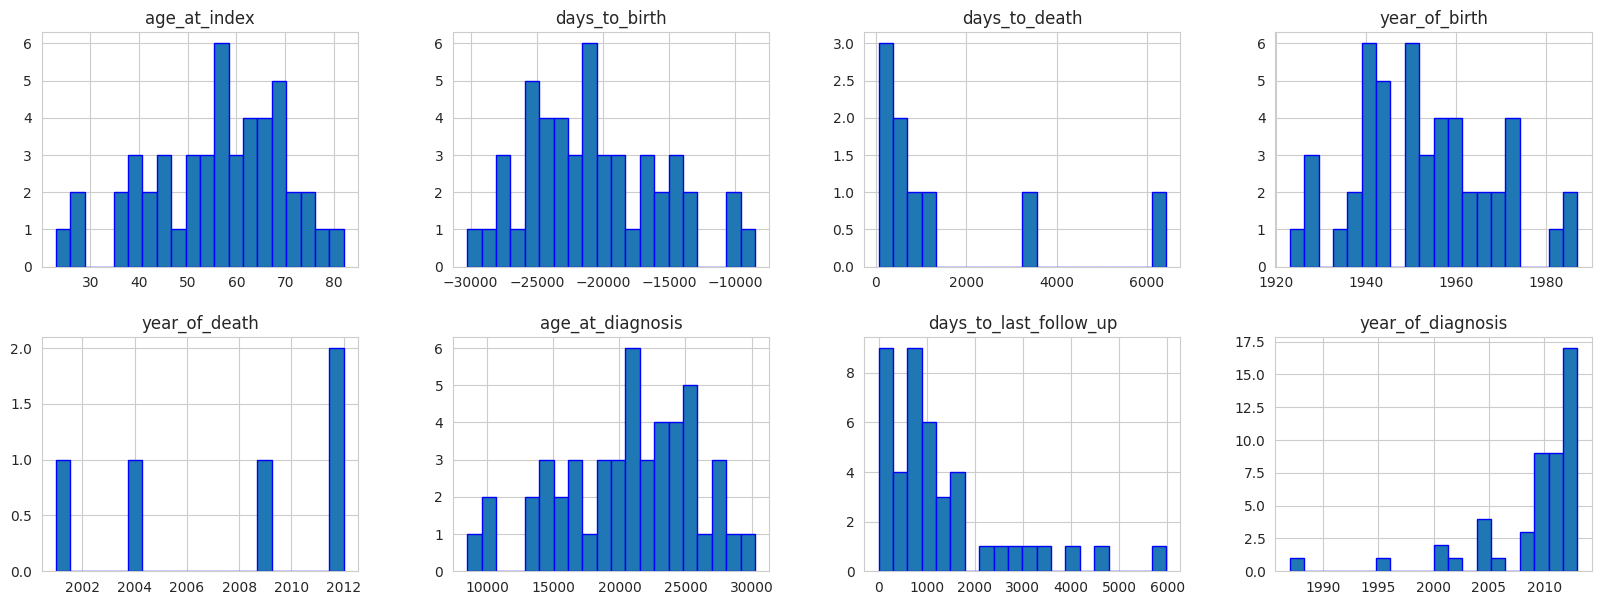

In [216]:
clinical_info_thinned[continuous_features].hist(layout=(-1, 4),
                                                figsize=(20, 7),
                                                bins=20,
                                                edgecolor='b');

Отметим, что количество дней до дня рождения является отрицательным числом. Возраст постановки диагноза вероятно высчитывается в днях. При этом возраст попадания в базу измеряется в годах. В нашей выборке нет подростков и детей (< 18 лет).

Для обучения модели признаки необходимо масштабировать.

**Предположим, что целевой переменной является vital_status, т.е. жив человек или мёртв.**

Рассмотрим несколько числовых признаков для примера.

#### age_at_index

Вероятно возраст, в котором пациент попал в данную базу.

Text(0.5, 0, 'age_at_index')

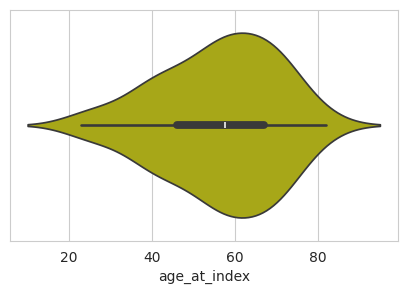

In [217]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['age_at_index'], orient='h', color='y')
plt.xlabel('age_at_index')

Каких-то явных выбросов не наблюдается. Рассмотрим распределение. Также подсветим жив человек или нет.

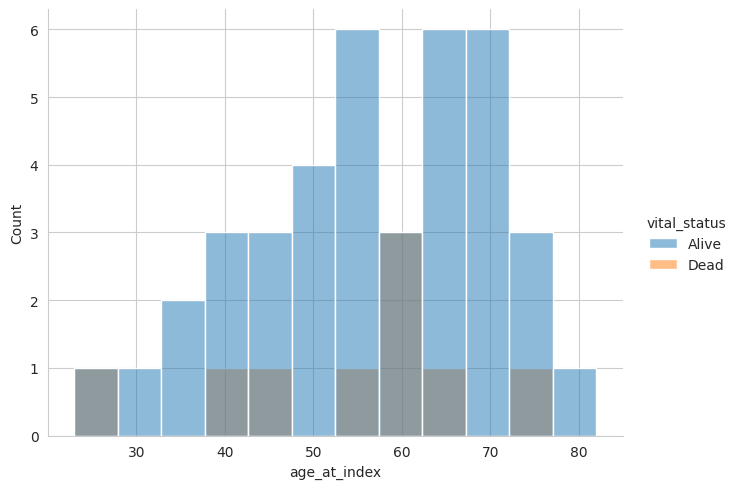

In [218]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['age_at_index'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist',
            # kde=True
            )

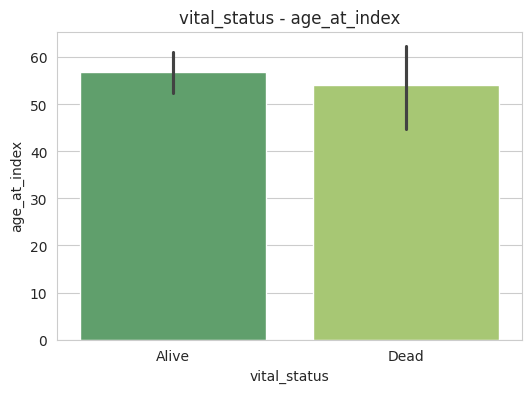

In [219]:
plt.figure(figsize=(6,4))

sns.barplot(data=clinical_info_thinned,
            x='vital_status',
            y='age_at_index',
            palette='summer')
plt.title('vital_status - age_at_index')
plt.show();

Средний возраст умерших и живущих людей достаточно близок. Доверительный интервал у умерших больше.

#### days_to_birth

Предполагаю, что фактически это возраст в днях в момент постановки диагноза (или индексирования в базу). И считается он в отрицательную область. Должна быть отрицательная корреляция этого признака и возраста.

Text(0.5, 0, 'days_to_birth')

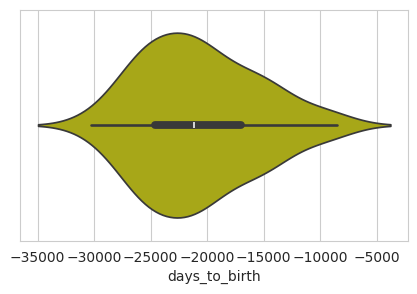

In [220]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['days_to_birth'], orient='h', color='y')
plt.xlabel('days_to_birth')

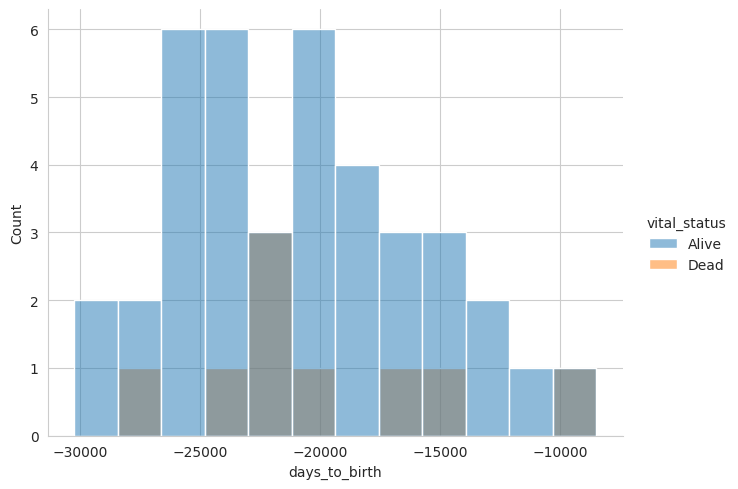

In [221]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist',
            # kde=True
            )

In [222]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', round(np.corrcoef(clinical_info_thinned['days_to_birth'], clinical_info_thinned['age_at_index'])[0][1], 5))

Коэффициент корреляции  =  -0.99984


Да, имеем большую корреляцию. Если бы обучали модель, то можно было бы каким-либо признаком пренебречь.

#### days_to_death

Text(0.5, 0, 'days_to_death')

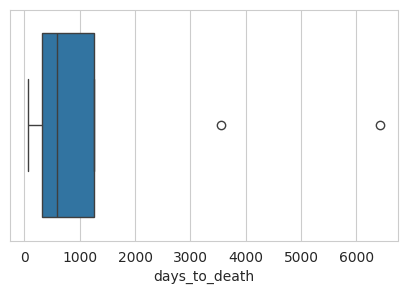

In [223]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['days_to_death'], orient='h')
plt.xlabel('days_to_death')

Здесь наблюдаются люди с очень сильными отклонениями по количеству дней до смерти.

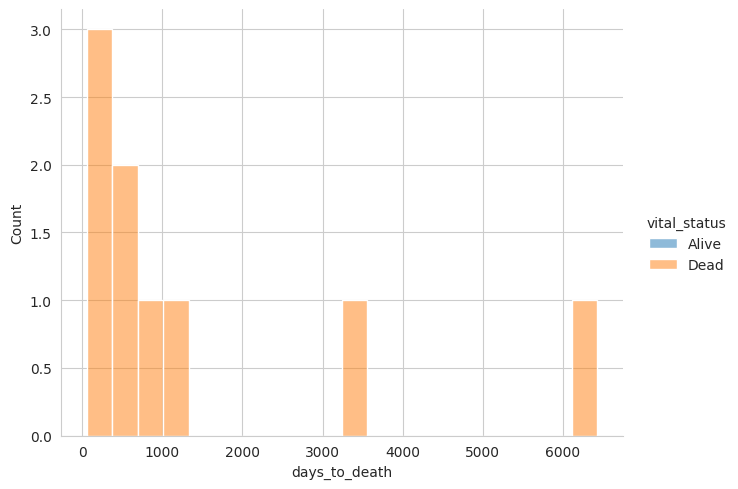

In [224]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_death'],
            legend=True,
            aspect=1.3,
            bins=20,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

Очевидный результат, что данный признак будет отражать только тех, кто умер. Впрочем, видно, что ошибочных данных по этому признаку у нас нет.

Но главная проблема, у нас в нашей выборке очень малое количество данных по умершим.

In [225]:
len(clinical_info_thinned[clinical_info_thinned['vital_status'] == 'Dead'])

9

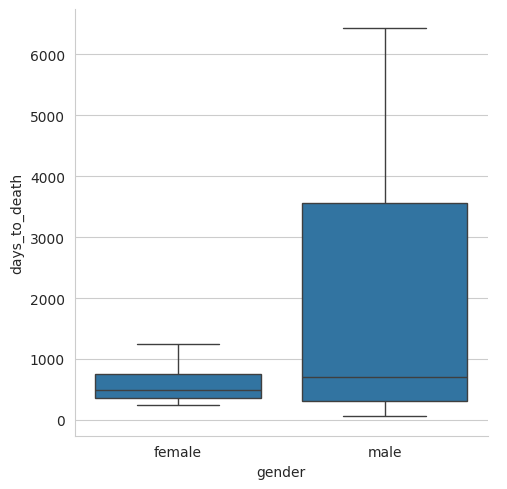

In [226]:
sns.catplot(data=clinical_info_thinned,
            x="gender",
            y="days_to_death",
            kind="box")

In [227]:
clinical_info_thinned[(clinical_info_thinned['vital_status'] == 'Dead') & (clinical_info_thinned['days_to_death'] > 3000)][['year_of_diagnosis', 'days_to_death', 'gender']]

,year_of_diagnosis,days_to_death,gender
28,1987.0,6425.0,male
50,2002.0,3553.0,male


#### year_of_death

Text(0.5, 0, 'year_of_death')

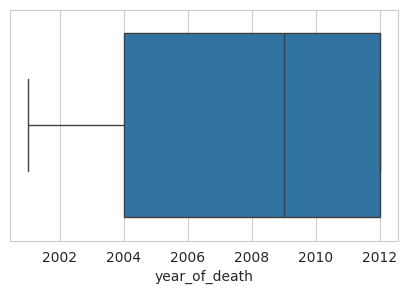

In [228]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['year_of_death'], orient='h')
plt.xlabel('year_of_death')

In [229]:
clinical_info_thinned['year_of_death'].unique()

array([  nan, 2012., 2001., 2004., 2009.])

#### age_at_diagnosis

возраст постановки диагноза

Text(0.5, 0, 'age_at_diagnosis')

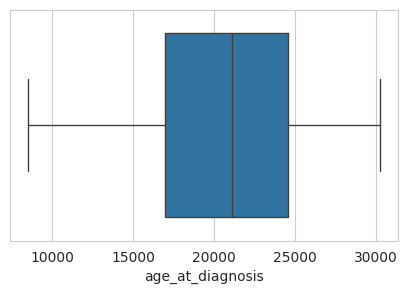

In [230]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['age_at_diagnosis'], orient='h')
plt.xlabel('age_at_diagnosis')

In [231]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', round(np.corrcoef(clinical_info_thinned['age_at_diagnosis'], clinical_info_thinned['age_at_index'])[0][1], 5))

Коэффициент корреляции  =  0.99984


Здесь линейная взаимосвязь присутствует между возрастом постановки диагноза и возрастом индексации.

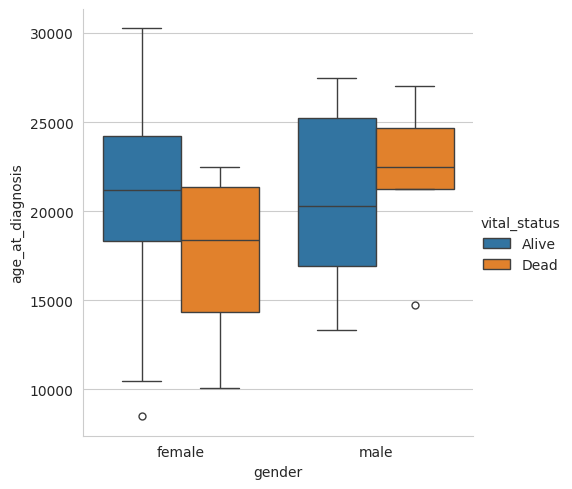

In [232]:
sns.catplot(data=clinical_info_thinned,
            x="gender",
            y="age_at_diagnosis",
            hue='vital_status',
            kind="box")

Вероятно мужчины позже проводят диагностику.

#### Матрица корреляции

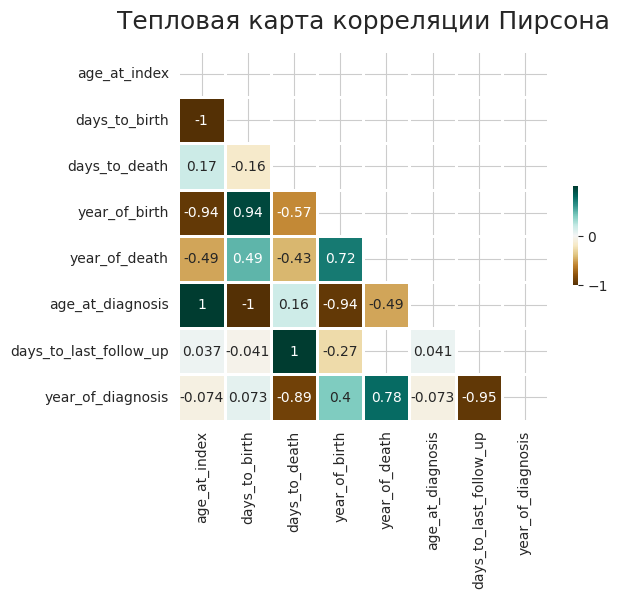

In [233]:
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(clinical_info_thinned.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    clinical_info_thinned.corr(numeric_only=True).round(4),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=16
);

- Очень много возрастных и временных характеристик, многие скоррелированы.
- Отрицательные взаимосвязи между days_of_birth и другими возрастными характеристиками объясняются системой отсчёта. Возможно стоило поменять значения на модуль в этом столбце.
- Год постановки диагноза и количество дней до смерти имеют большую линейную корреляцию. (
). Но это объясняется малой выборкой и попаданием в двух экстремальных значений количества дней в нашу выборку.
- На мой взгляд, можно говорить о линейной зависимости между годом постановки диагноза и годом смерти, пусть и достаточно слабой.
- Можно говорить о взаимосвязи года рождения и количества дней до смерти. И года рождения и года смерти.

### Категориальные признаки.

In [234]:
clinical_info_thinned.describe(include='category')

,case_id,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
count,48,48,48,48,48,46,42,46,48,48,48,48,23,25
unique,48,2,2,3,2,2,4,2,10,2,20,20,3,2
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,not hispanic or latino,female,white,Alive,No,Stage II,No,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",No,Yes
freq,1,36,26,29,39,35,17,25,38,47,16,16,20,23


In [235]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=False, h=6, w=4):
    plt.figure(figsize=(h,w))

    print(f'Наличие пропусков: {clinical_info_thinned[feat].isna().any()}')

    if pie:
        clinical_info_thinned[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True,
                                                            # labels=labels
                                                            ).set(title=title)

    sns.displot(data=clinical_info_thinned,
                x=clinical_info_thinned[feat],
                legend=True,
                aspect=aspect,
                hue=clinical_info_thinned['vital_status'],
                kind='hist').set(title=title)

Рассмотрим несколько категориальных признаков в качестве примера.




#### gender

Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

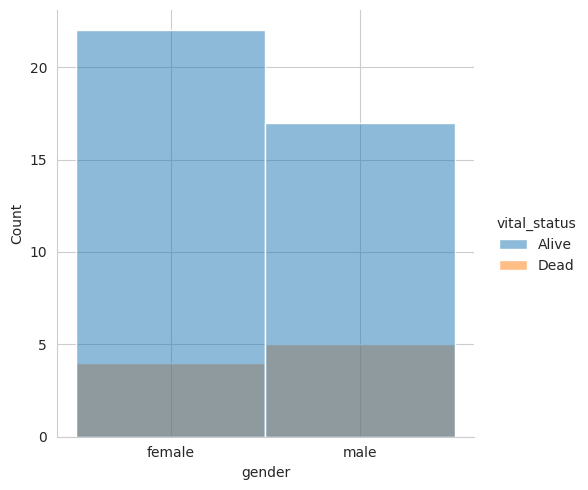

In [236]:
title = "Гендер"

show_cat_feat('gender', title)

In [237]:
temp_ = clinical_info_thinned.groupby(['gender', 'vital_status']).agg(Count=('gender', 'count'))
temp_

Count
gender vital_status       
female Alive            22
       Dead              4
male   Alive            17
       Dead              5

In [238]:
female_mortality = temp_.loc[('female',  'Dead')][0] / len(clinical_info_thinned)
male_mortality = temp_.loc[('male',  'Dead')][0] / len(clinical_info_thinned)

print(f'Смертность у женщин {round(female_mortality, 3) * 100} ниже, чем смертность мужчин {round(male_mortality, 3) * 100}')

Смертность у женщин 8.3 ниже, чем смертность мужчин 10.4


Но проверим эту часть в гипотезах ниже.

#### ann_arbor_clinical_stage

Наличие пропусков: True


<Figure size 1000x800 with 0 Axes>

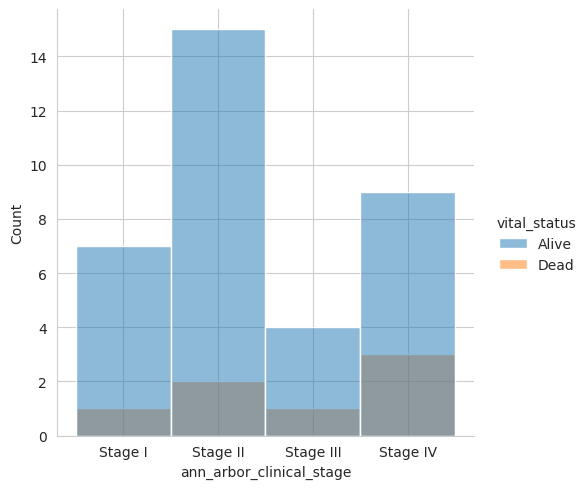

In [239]:
title = "Клиническая стадия"

show_cat_feat('ann_arbor_clinical_stage', title, h=10, w=8)

In [241]:
clinical_info_thinned[clinical_info_thinned['vital_status'] == 'Dead'][['vital_status','ann_arbor_clinical_stage', 'days_to_death']]

,vital_status,ann_arbor_clinical_stage,days_to_death
0,Dead,Stage I,248.0
2,Dead,NaN,58.0
4,Dead,Stage II,391.0
22,Dead,Stage IV,595.0
28,Dead,NaN,6425.0
42,Dead,Stage IV,1252.0
50,Dead,Stage III,3553.0
52,Dead,Stage II,708.0
86,Dead,Stage IV,313.0


Рассмотрим непрерывную характеристику количество дней до смерти с разрезом по стадии и полу.

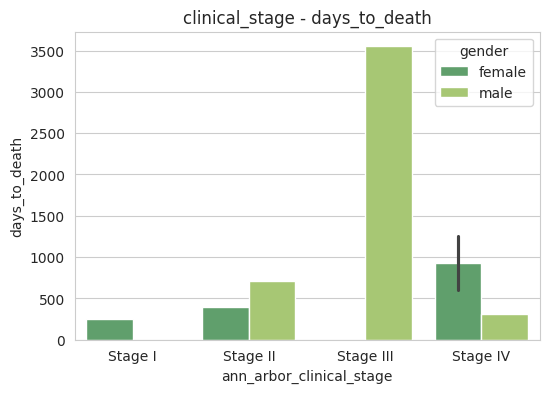

In [242]:
plt.figure(figsize=(6,4))

sns.barplot(x='ann_arbor_clinical_stage',
            y='days_to_death',
            hue='gender',
            data = clinical_info_thinned,
            palette='summer')
plt.title('clinical_stage - days_to_death')
plt.show();

Несколько неожиданный результат, что количество дней до смерти у людей с третьей стадией в среднем (если вообще есть смысл говорить о среднем на одном человеке) больше, чем у людей с другими стадиями. Но опять же объясняется наличием выбросов. И очень малым количеством умерших людей, попавших в нашу выборку.

### Гипотезы

#### Гипотеза 1.
**Нулевая гипотеза (H0):** смертность при раке не зависит от пола пациента;

**Альтернативная гипотеза (H1):** смертность при раке зависит от пола пациента.


In [244]:
from scipy.stats import chi2_contingency

# создаем таблицу сопряженности
contingency_table = pd.crosstab(clinical_info_thinned['gender'], clinical_info_thinned['vital_status'])
contingency_table

vital_status,Alive,Dead
gender,,
female,22,4
male,17,5


In [245]:
# проводим тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('chi2 =', chi2)
print('p =', p)
print('dof =', dof)
print('expected frequencies:\n', expected)

chi2 = 0.07746100053792361
p = 0.7807681337146253
dof = 1
expected frequencies:
 [[21.125  4.875]
 [17.875  4.125]]


Значение p-value (p = 0.7807681337146253) больше уровня значимости (обычно равного 0.05), поэтому наша гипотеза о зависимости смертности при раке от пола пациента не подтверждается статистически.

Таким образом, мы можем сделать вывод, что смертность при раке не зависит от пола пациента. Однако следует учитывать, что размер выборки в данном датасете невелик, и результаты могут отличаться при рассмотрении большего количества наблюдений.

#### Гипотеза 2.

Гипотеза: средний возраст пациентов при диагностировании рака зависит от стадии рака.

**Нулевая гипотеза (H0):** средний возраст пациентов при диагностировании рака не зависит от стадии рака;

**Альтернативная гипотеза (H1)**: средний возраст пациентов при диагностировании рака зависит от стадии рака.

In [246]:
clinical_info_thinned['ann_arbor_clinical_stage'] = clinical_info_thinned['ann_arbor_clinical_stage'].astype('category').cat.codes

средний возразст для стардии рака

In [247]:
grouped_data = clinical_info_thinned.groupby('ann_arbor_clinical_stage')['age_at_diagnosis'].mean()
grouped_data

ann_arbor_clinical_stage
-1    23131.833333
 0    20870.125000
 1    18066.058824
 2    24323.000000
 3    21717.916667
Name: age_at_diagnosis, dtype: float64

Теперь воспользуемся методом f_oneway из библиотеки scipy.stats для проверки гипотезы о равенстве средних значений возраста пациентов в разных группах:

In [248]:
from scipy.stats import shapiro, anderson, kstest

# тест Шапиро-Уилка
stat, p_value = shapiro(clinical_info_thinned['age_at_diagnosis'])
print('Shapiro-Wilk test:', stat, p_value)

Shapiro-Wilk test: 0.9724112749099731 0.31355372071266174


Значение p-value (p_value = 0.3136) в результатах теста Шапиро-Уилка превышает уровень значимости (обычно равного 0.05), поэтому мы не можем отвергнуть нулевую гипотезу о нормальности распределения данных. Таким образом, мы можем сделать вывод о том, что данные нормально распределены.

In [249]:
from scipy.stats import f_oneway

# извлекаем данные для каждой группы
group1 = clinical_info_thinned[clinical_info_thinned['ann_arbor_clinical_stage'] == 0]['age_at_diagnosis']
group2 = clinical_info_thinned[clinical_info_thinned['ann_arbor_clinical_stage'] == 1]['age_at_diagnosis']
group3 = clinical_info_thinned[clinical_info_thinned['ann_arbor_clinical_stage'] == 2]['age_at_diagnosis']
group4 = clinical_info_thinned[clinical_info_thinned['ann_arbor_clinical_stage'] == 3]['age_at_diagnosis']

# проводим тест ANOVA
f_stat, p_val = f_oneway(group1, group2, group3, group4)
print('f_stat =', f_stat)
print('p_val =', p_val)

f_stat = 2.5029841043397965
p_val = 0.07383161916798202


Значение p-value (p_val = 0.0738) больше уровня значимости (обычно равного 0.05), поэтому мы не можем отвергнуть нулевую гипотезу и сделать вывод о том, что средний возраст пациентов при диагностировании рака не зависит от стадии рака.